Matriz de Referencias
[[[ 12.5664]
  [ 25.1327]
  [ 50.2655]
  [100.531 ]]]
Ecos lineales
[[0.]
 [0.]
 [0.]
 [0.]]


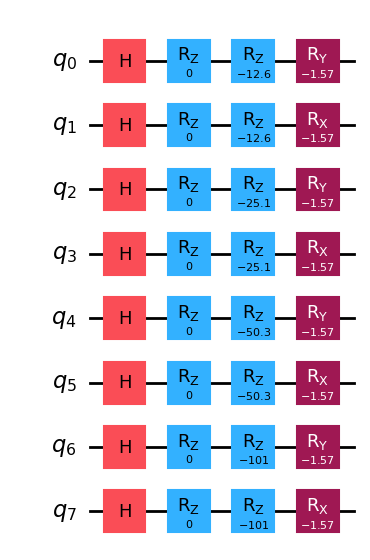

In [126]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import numpy as np
from numpy import pi
from math   import sin
from math   import sqrt


qc = QuantumCircuit(6)
qc.h(1)
qc.h(2)
#qc.rz(1,2)
qc.h(3)
qc.rz(3.14159/4,3)
qc.rz(-3.14159/4,3)
qc.h(4)
qc.rz(3.14159/4,4)
qc.rz(-3.14159/4,4)
qc.ry(-3.14159/2,4)
qc.h(5)
qc.rz(3.14159/4,5)
qc.rz(-3.14159/4,5)
qc.rx(-3.14159/2,5)



print("Matriz de Referencias")
print(Rnfk)

Sfk=function_Calc_Dist(X,K,D,Delta,F)

print("Ecos lineales")
print(Sfk)


qc.draw('mpl')

#Rnk = Rnfk[:,0,:]

#Obtener el estado inicial del qubit
#state = Statevector.from_instruction(qc)
#Graficar la esfera de Bloch
#plot_bloch_multivector(state)


In [113]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import numpy as np
from numpy import pi
from math   import sin
from math   import sqrt



def function_Calc_Dist(X,K,D,Delta,F):
    Sfk = np.zeros(shape = (len(F),K))
    for f in range(len(F)):
        for k in range(K):
            Sfk[f,k]=round(4*pi*sqrt(D**2+((k)*Delta-X)**2)*F[f]/C,4)
    return Sfk


def function_mat_ref(N,K,D,Delta,F):
    Rnfk = np.zeros(shape = (N,len(F),K))
    for f in range(len(F)):
        for k in range(K):
            for n in range(N):
                Rnfk[n,f,k]=round(4*pi*sqrt(D**2+((k-n)*Delta)**2)*F[f]/C,4)
    return Rnfk
        


def Calc_Fn(DimF,Sfk,Rnfk):
    PtoGri,Frec,PtoDisp = Rnfk.shape
    qc = QuantumCircuit(2*Frec*PtoDisp*PtoGri)
    for n in range(PtoGri):
        for k in range(PtoDisp):
            for f in range(Frec):
                QbitReal =2*f + 2*k*Frec + 2*n*Frec*PtoDisp
                QbitImag =2*f + 2*k*Frec + 2*n*Frec*PtoDisp + 1
                qc.h(QbitReal)
                qc.rz(Sfk[f,k],QbitReal)
                qc.rz(-Rnfk[n,f,k],QbitReal)
                qc.ry(-3.14159/2,QbitReal)
                qc.h(QbitImag)
                qc.rz(Sfk[f,k],QbitImag)
                qc.rz(-Rnfk[n,f,k],QbitImag)
                qc.rx(-3.14159/2, QbitImag)
    return qc



Delta = 0.05
N=4
K=3
X=0.095
D=0.05
C=1
DimF = 4
F=np.zeros(DimF)
for i in range (DimF):
    F[i]=2**i
Rnfk=function_mat_ref(N,K,D,Delta,F)

print("Matriz de Referencias")
print(Rnfk)

Sfk=function_Calc_Dist(X,K,D,Delta,F)

print("Ecos lineales")
print(Sfk)


qc = Calc_Fn(DimF,Sfk,Rnfk)
qc.draw('mpl')

Rnk = Rnfk[:,0,:]

#print("Cantidad Qbits")
#print(n)

#if n <= 4:
# Obtener el estado inicial del qubit
#state = Statevector.from_instruction(qc)
# Graficar la esfera de Bloch
#plot_bloch_multivector(state)



Matriz de Referencias
[[[ 0.6283  0.8886  1.405 ]
  [ 1.2566  1.7772  2.8099]
  [ 2.5133  3.5543  5.6199]
  [ 5.0265  7.1086 11.2397]]

 [[ 0.8886  0.6283  0.8886]
  [ 1.7772  1.2566  1.7772]
  [ 3.5543  2.5133  3.5543]
  [ 7.1086  5.0265  7.1086]]

 [[ 1.405   0.8886  0.6283]
  [ 2.8099  1.7772  1.2566]
  [ 5.6199  3.5543  2.5133]
  [11.2397  7.1086  5.0265]]

 [[ 1.9869  1.405   0.8886]
  [ 3.9738  2.8099  1.7772]
  [ 7.9477  5.6199  3.5543]
  [15.8953 11.2397  7.1086]]]
Ecos lineales
[[ 1.3491  0.8453  0.6315]
 [ 2.6981  1.6906  1.2629]
 [ 5.3962  3.3813  2.5258]
 [10.7925  6.7625  5.0516]]


In [114]:
from qiskit.quantum_info import Pauli, SparsePauliOp
from itertools import product

n = qc.num_qubits
#combinations = list(product('IZ', repeat=n))
#operator_strings = [Pauli(''.join(comb)) for comb in combinations] #['Z' * i + 'Z' + 'I' *(n-1-i) for i in range(n-1)]
operator_strings = ['I'*(n-1-i) + 'Z' + 'I' * i  for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_strings) for operator_strings in operator_strings]
#print(operators)

['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIII',

In [115]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend_name = "ibm_brisbane"
backend = QiskitRuntimeService().get_backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_manager.run(qc)

operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]


C:\Users\mpaur\AppData\Local\Temp\ipykernel_8700\4231297184.py:5: DeprecationWarning: The get_backend() method is deprecated as of qiskit-ibm-runtime 0.24 and will be removed no sooner than 3 months after the release date. Please use backend() instead.
  backend = QiskitRuntimeService().get_backend(backend_name)


In [116]:
from qiskit_ibm_runtime import Estimator as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level = 1
options.optimization_level = 0
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

estimator = Estimator(backend, options=options)

job = estimator.run([(qc_transpiled , operators_transpiled_list)])

job_id = job.job_id()

print(job_id)


cw3j3z7jz3x0008je67g


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'shots': 4096, 'target_precision': 0.015625, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32}


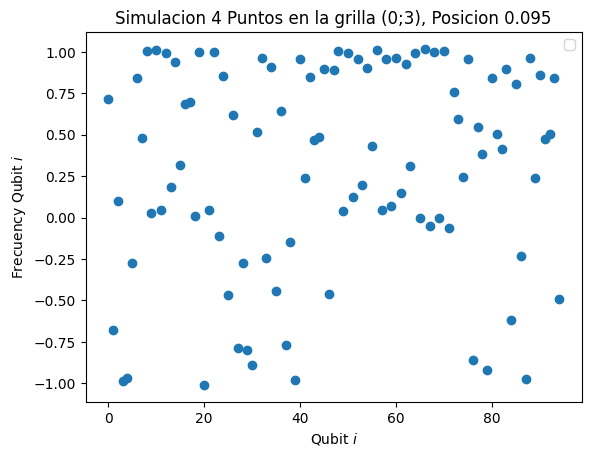

In [117]:
import matplotlib.pyplot as plt


data = list(range(0, len(operators)))
result = job.result()[0]
values = result.data.evs
values = [v for v in values]

print(result.metadata)

plt.scatter(data, values, marker ='o')
plt.title(f'Simulacion {N} Puntos en la grilla (0;{N-1}), Posicion {X}')
plt.xlabel('Qubit $i$')
plt.ylabel(r'Frecuency Qubit $i$')
plt.legend()
plt.show()



salida de los coeficientes reales
[[ 0.47613029 15.57577795  0.46322205]
 [ 0.09861615  5.63100974  3.33126354]
 [14.86743769 14.8987228  16.1359497 ]
 [ 0.28032877  0.16706283  3.37923173]]

salida de los coeficientes fijos
[[0.6283 0.8886 1.405  1.9869]
 [0.8886 0.6283 0.8886 1.405 ]
 [1.405  0.8886 0.6283 0.8886]]


[ 63.45383787  34.63482929 191.23889768  14.88923329]


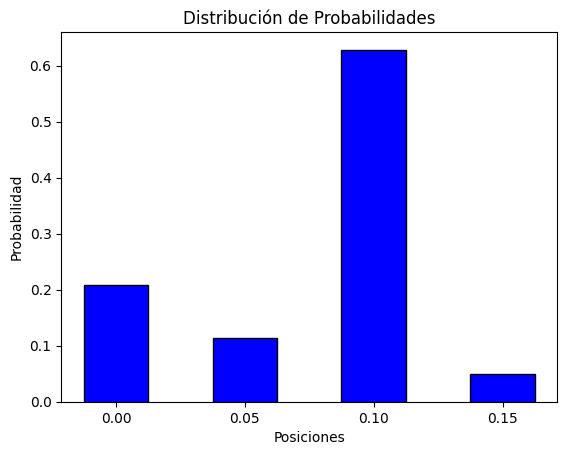

In [118]:
PtoGri,Frec,PtoDisp = Rnfk.shape

FnkReal=np.zeros(shape=(PtoGri,PtoDisp))
FnkImag=np.zeros(shape=(PtoGri,PtoDisp))

for n in range(PtoGri):
    for k in range(PtoDisp):
        for f in range(Frec):
            QbitReal =2*f + 2*k*Frec + 2*n*Frec*PtoDisp
            QbitImag =2*f + 2*k*Frec + 2*n*Frec*PtoDisp + 1
            FnkReal[n,k] = FnkReal[n,k]+values[QbitReal]
#            FnkImag[n,k] = FnkReal[n,k]+values[QbitImag]



x,y=FnkReal.shape
print("salida de los coeficientes reales")
print(FnkReal**2)
print("\nsalida de los coeficientes fijos")

print(Rnk.transpose())
print("\n")
resultado1=np.matmul(FnkReal**2,Rnk.transpose())
resultado2=sum(resultado1.transpose())
print( resultado2)


frecuencias = resultado2/sum(resultado2)  # Ejemplo: resultados de 1 a 5
resultados = np.linspace(0, (N-1)*Delta, num=N)  # Resultados del 1 al 5

# Creamos el gráfico de barras
plt.bar(resultados, frecuencias, width = Delta/2 ,color='blue', edgecolor='black')

# Añadimos etiquetas y título
plt.xlabel('Posiciones')
plt.ylabel('Probabilidad')
plt.title('Distribución de Probabilidades')

# Mostramos el gráfico
plt.xticks(resultados)  # Asegura que se muestren los números en el eje x
plt.show()
